In [1]:
import psutil
# Get the memory usage
memory_info = psutil.Process().memory_info()
memory_usage = memory_info.rss / (1024 ** 2)  # Convert bytes to MB
print(f"Memory usage: {memory_usage:.2f} MB")

Memory usage: 62.98 MB


In [2]:
import mlx.core as mx
from mlx_vlm import load, generate
from mlx_vlm.prompt_utils import apply_chat_template
from mlx_vlm.utils import load_config
import time
model_path = "mlx-community/Qwen2.5-VL-3B-Instruct-8bit"

/Users/wuminghsuan/Documents/mlx/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [8]:
start_time = time.time()
# Load the model
model, processor = load(model_path)
config = load_config(model_path)
end_time = time.time()
print("Time taken to load the model: ", end_time - start_time)

Fetching 11 files: 100%|██████████| 11/11 [00:00<00:00, 245411.40it/s]

Time taken to load the model:  4.177500009536743


In [9]:
import random

# List of image URLs
image_urls = [
    "http://images.cocodataset.org/val2017/000000039769.jpg",
    "http://images.cocodataset.org/val2017/000000057870.jpg",
    "http://images.cocodataset.org/val2017/000000252219.jpg",
    "http://images.cocodataset.org/val2017/000000397133.jpg",
]

# Randomly select an image URL
random_image_url = random.choice(image_urls)
print(f"Random image URL: {random_image_url}")

# Update the image variable with the new random image URL
image = [random_image_url]

start_time = time.time()
prompt = "Describe this image."

# Apply chat template
formatted_prompt = apply_chat_template(
    processor, config, prompt, num_images=len(image)
)
end_time = time.time()
print("Time taken to prepare the input: ", end_time - start_time)

Random image URL: http://images.cocodataset.org/val2017/000000252219.jpg
Time taken to prepare the input:  0.00039386749267578125


In [ ]:
image[0]

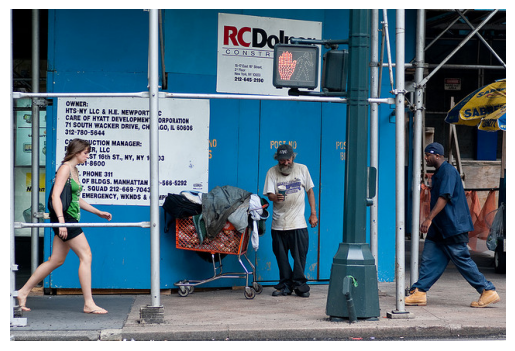

In [10]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
# Fetch the image
response = requests.get(image[0])
img = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [11]:
start_time = time.time()
# Generate output
output = generate(model, processor, formatted_prompt, image, verbose=False)
print(output)
end_time = time.time()
print("Time taken to generate the output: ", end_time - start_time)

The image depicts a street scene with several notable elements. In the foreground, there is a person walking on the sidewalk, wearing a green tank top and black shorts. They appear to be in motion, possibly crossing the street. 

To the right of the person walking, there is a man standing near a blue construction barrier. He is wearing a white t-shirt, black pants, and a baseball cap. He is holding a phone in his hand and appears to be looking at it. Next to him, there is an orange shopping cart with a gray jacket draped over it.

In the background, there is a large blue construction barrier with white text on it. The text includes the name "RCDollars" and other information about the construction company. There is also a red and white sign with a hand symbol indicating "Do Not Walk" on a pedestrian crossing signal. 

To the right of the construction barrier, there is a man walking away from the camera, wearing a blue shirt and blue jeans. He is also wearing a baseball cap. 

The scene 

In [12]:
import psutil
# Get the memory usage
memory_info = psutil.Process().memory_info()
memory_usage = memory_info.rss / (1024 ** 2)  # Convert bytes to MB
print(f"Memory usage: {memory_usage:.2f} MB")

Memory usage: 939.48 MB
